In [87]:
from eyring_model import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 8
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')

In [2]:
T = 300
multi = True
dH_barrier = 3.5
dS_barrier = -9/T
dH_sigma = dH_barrier/3
dS_sigma = -dS_barrier/3
n_paths = 2000 # infinite limit, approximately corresponds to unit area = 0.1 um^2

barrier_dist = 'equal'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier])}


#### Equal number of jumps, equal jump lengths, equal barriers

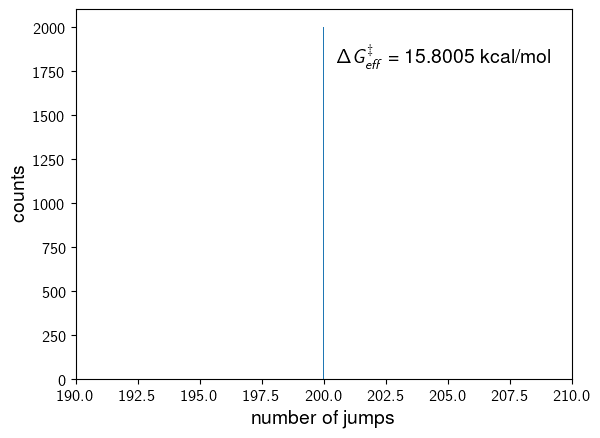

In [3]:
n_jump_params = {'mu' : 200}
rng = np.random.default_rng()
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)


dG0 = model.calculate_effective_barrier()

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(n_jump_params['mu']+0.5, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(190, 210)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

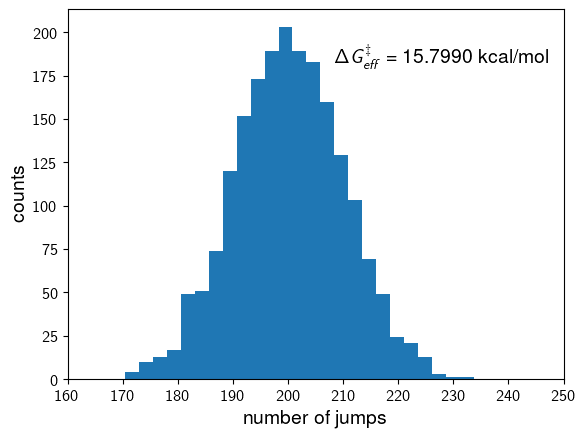

In [4]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(160, 250)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 2000 jumps, std = 100**

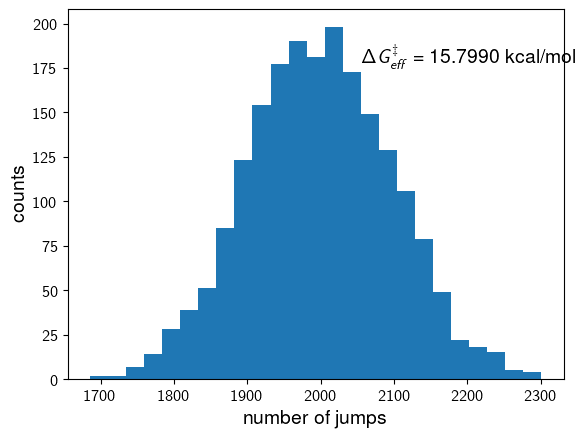

In [5]:
n_jump_params = {'mu' : 2000,
                'sigma' : 100}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

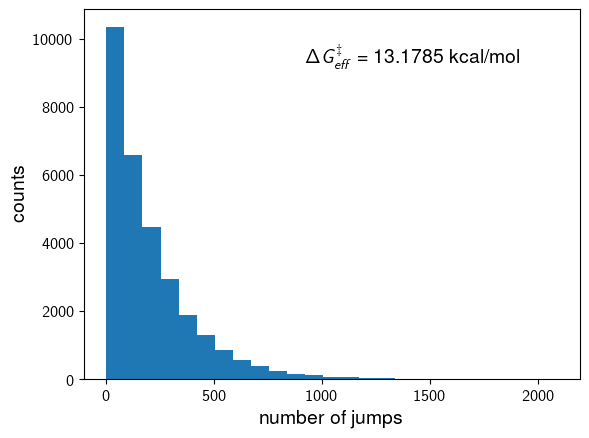

In [6]:
n_paths = 30_000

n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [7]:
model.calculate_permeability()
sorted_paths = np.array(model.paths)[model.permeabilities.argsort()]
print('Paths with low permeability:')
for p in sorted_paths[:5]:
    print(p.n_jumps)

print()

print('Paths with high permeability:')
for p in sorted_paths[-5:]:
    print(p.n_jumps)

Paths with low permeability:
2089
2032
1969
1935
1841

Paths with high permeability:
1
1
1
1
1


**Mean = 2000**

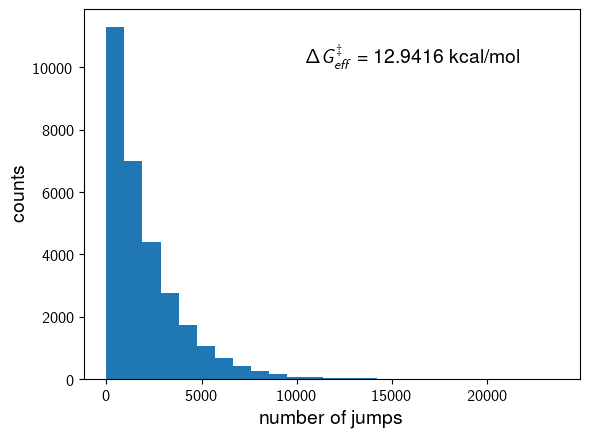

In [8]:
n_paths = 30_000

n_jump_params = {'beta' : 2000}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Equal jump lengths, equal number of jumps, equal barriers

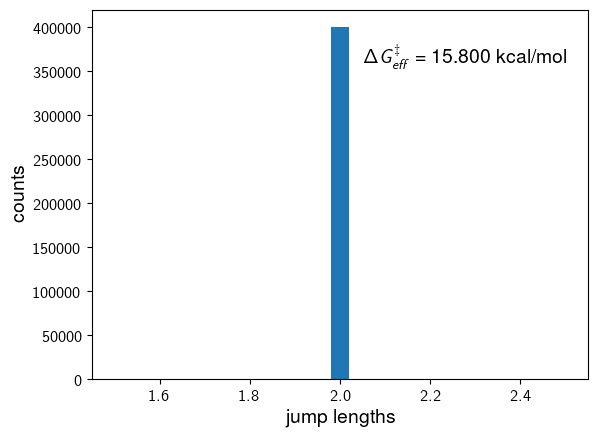

In [9]:
n_paths = 2000

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(jump_lengths.mean()+0.05, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

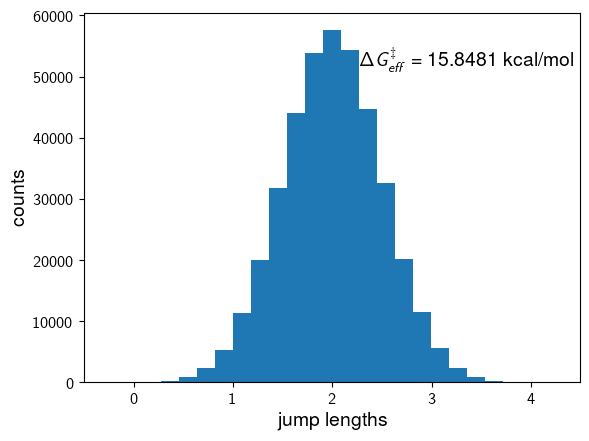

In [10]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 20**

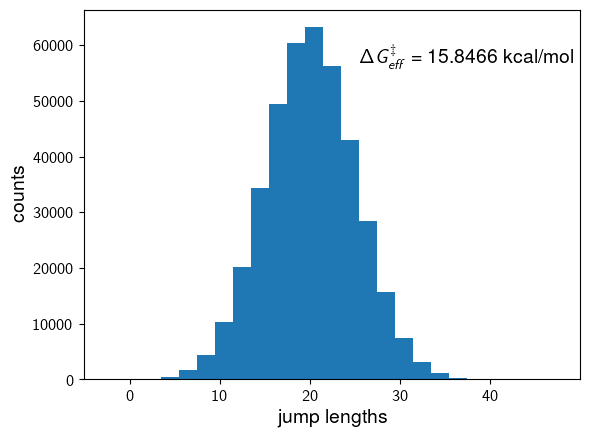

In [11]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 20, 'sigma' : 5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

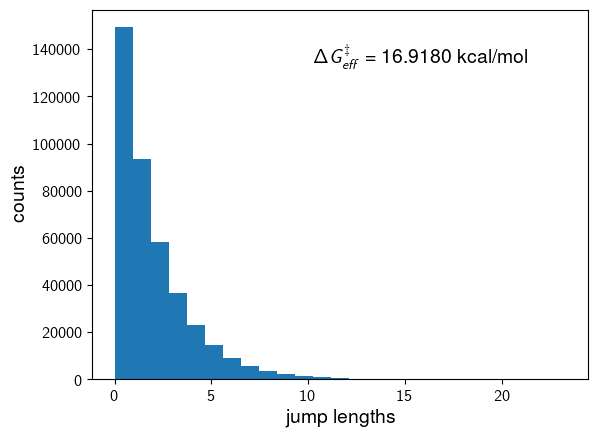

In [12]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [13]:
model.calculate_permeability()
sorted_paths = np.array(model.paths)[model.permeabilities.argsort()]
print('Paths with low permeability:')
print('mean, std, min, max')
for p in sorted_paths[:5]:
    print(p.jump_lengths.mean(), p.jump_lengths.std(),  p.jump_lengths.min(), p.jump_lengths.max())

print()

print('Paths with high permeability:')
print('mean, std, min, max')
for p in sorted_paths[-5:]:
    print(p.jump_lengths.mean(), p.jump_lengths.std(),  p.jump_lengths.min(), p.jump_lengths.max())

Paths with low permeability:
mean, std, min, max
2.187869901881213 2.0274901621539962 3.975755406357495e-06 10.012357605838433
1.7311485894335874 1.5754770120569912 5.542874880306415e-06 8.07873036567101
1.7771463319272953 1.7385914382786725 1.3057492500099929e-05 8.045618254428193
2.0087696734195926 2.2594728493768144 1.966587037104587e-05 12.102762912376631
1.908722474485114 1.7163865633871898 2.4561537924212153e-05 8.009725081854643

Paths with high permeability:
mean, std, min, max
2.0604076907648006 1.7058389113675338 0.030807049033078744 10.54611735214291
2.3516319216769688 2.125262365272339 0.03708533206979515 13.047934776996327
2.2220828267325583 2.2331872718750314 0.07008056147083108 14.346841653134167
2.099063936687929 1.7459401996543964 0.054651595558047286 9.371134911151561
2.0790397129105624 1.940347687345086 0.04257908018318507 12.796373476219964


**Mean = 20**

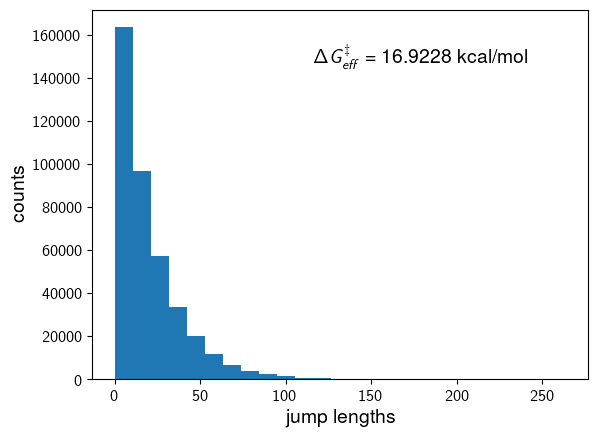

In [14]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 20}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, normally distributed jump lengths, equal barriers

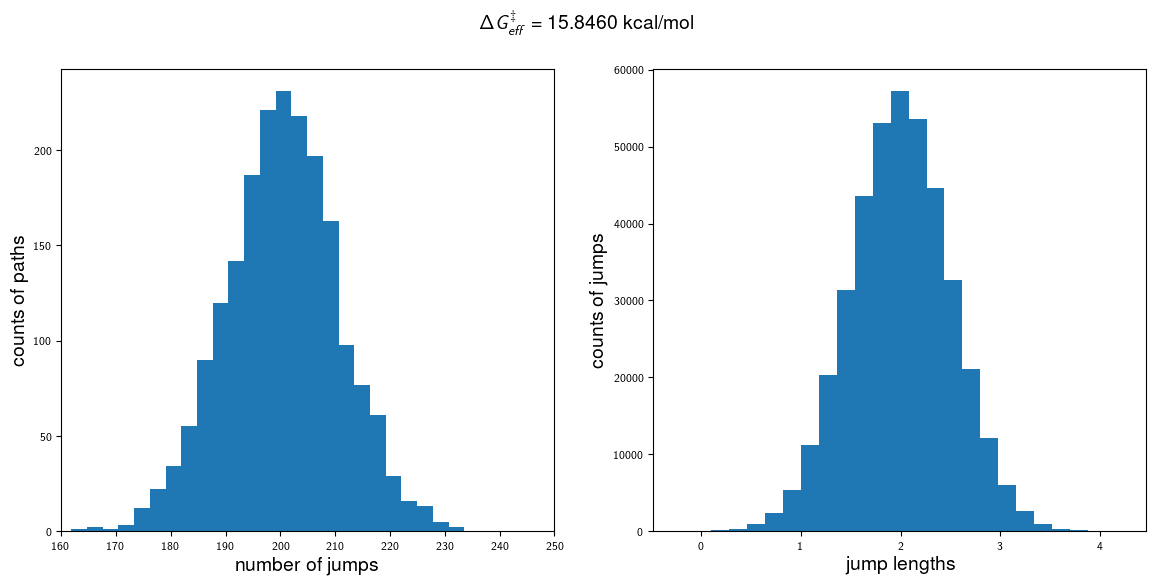

In [15]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Normally distributed number of jumps, exponentially distributed jump lengths, equal barriers

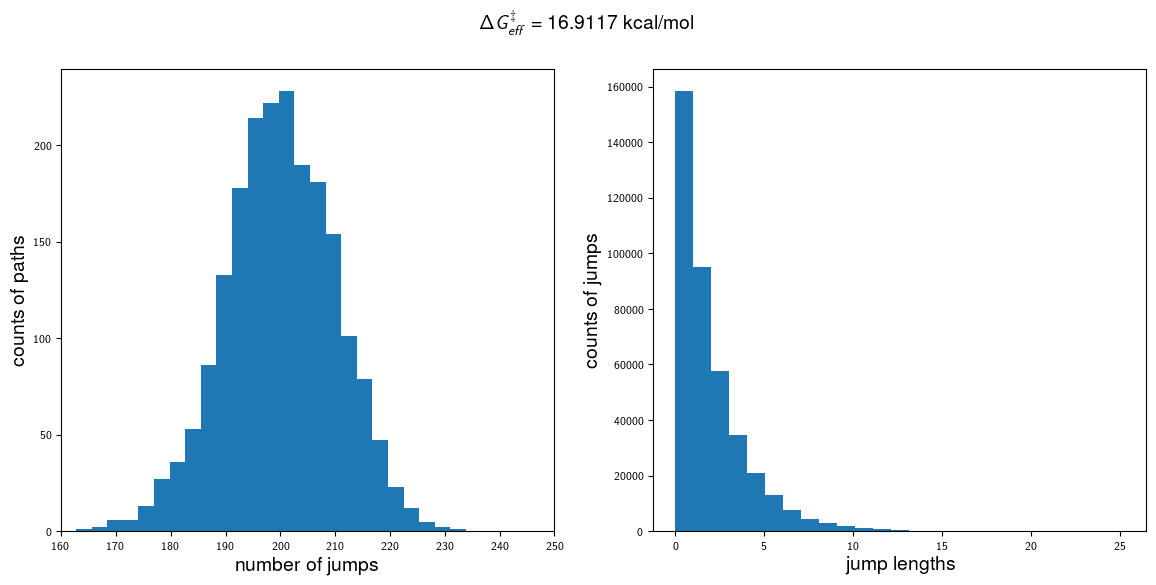

In [16]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, normally distributed jump lengths, equal barriers

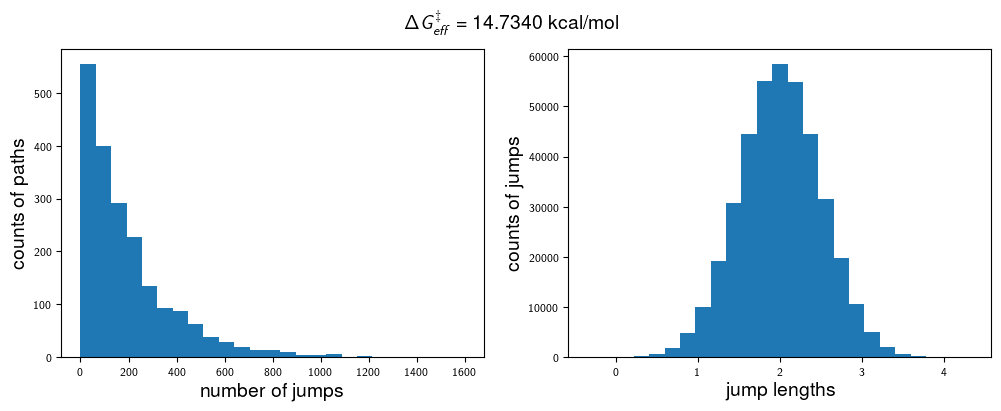

In [17]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, exponentially distributed jump lengths, equal barriers

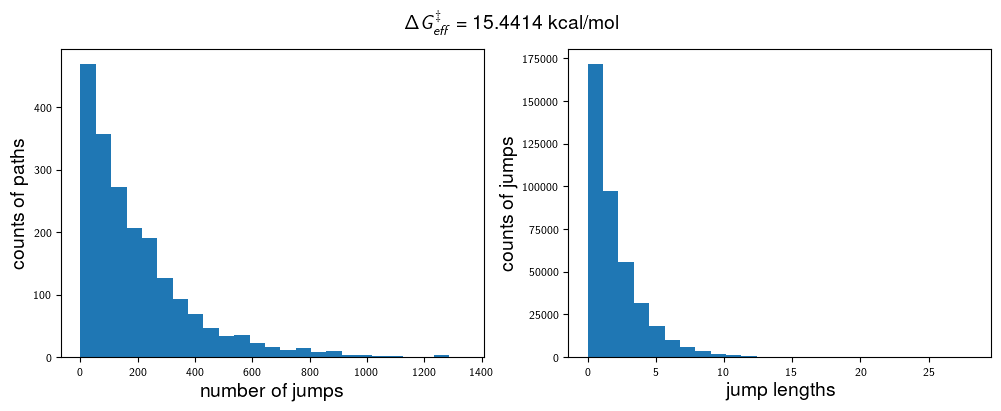

In [18]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

### Normal distributions for both length and number, sweeping through variance

In [19]:
import matplotlib.colors as mcolors

In [60]:
n_paths = 5000

len_sigs = np.linspace(0.1, 20, 20)
num_sigs = np.hstack([np.linspace(2, 100, 10),np.linspace(110,400, 10)])

effective_barriers = np.zeros((len(len_sigs),len(num_sigs)))
for i,ls in enumerate(len_sigs):
    for j,ns in enumerate(num_sigs):
        n_jump_params = {'mu' : 200,
                        'sigma' : ns}
        rng = np.random.default_rng()
        n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)
        idx = np.where(n_jumps <= 1)[0]
        if len(idx) > 0:
            n_jumps[idx] = 1

        jump_length_dist = 'normal'
        jump_length_params = {'mu' : 2, 'sigma' : ls}

        model = EyringModel(T=T)
        for n in range(n_paths):
            model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
            model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
            model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
            idx = np.where(model.paths[n].jump_lengths <= 0)[0]
            if len(idx) > 0:
                model.paths[n].jump_lengths[idx] = 0.001

        effective_barriers[i,j] = model.calculate_effective_barrier()

In [61]:
dG_min, dG_max = effective_barriers.min(), effective_barriers.max()
max_diff = dG_max - dG0
min_diff = dG0 - dG_min
print(dG_min, dG_max, max_diff, min_diff)

12.579300446177317 21.112842187041228 5.31238556949544 3.22115617136847


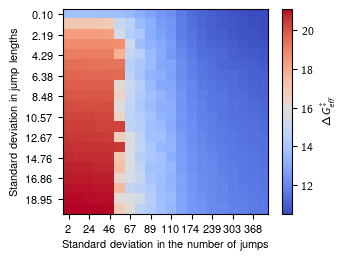

In [62]:
fig, ax = plt.subplots(1,1, figsize=(3.55, 2.6625))

len_sigs = np.linspace(0.1, 20, 20)
num_sigs = np.hstack([np.linspace(2, 100, 10),np.linspace(110,400, 10)])

n_labels = [f'{ns:.0f}' for ns in num_sigs]
l_labels = [f'{ls:.2f}' for ls in len_sigs]

ax.imshow(effective_barriers, cmap='coolwarm')
ax.xaxis.set_ticks(np.arange(0, len(num_sigs), step=2), labels=n_labels[::2])
ax.yaxis.set_ticks(np.arange(0, len(len_sigs), step=2), labels=l_labels[::2])

norm = mcolors.Normalize()
cb = fig.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(dG0-max_diff,dG0+max_diff), cmap='coolwarm'), ax=ax)
cb.set_label(label='$\Delta G_{eff}^{\ddag}$')

ax.set_xlabel('Standard deviation in the number of jumps')
ax.set_ylabel('Standard deviation in jump lengths')

fig.savefig('figs/length_number_competition.pdf')

In [40]:
n_paths = 5000

len_sigs = np.linspace(0.01, 20, 100)

len_dG = np.zeros((len(len_sigs)))
for i,ls in enumerate(len_sigs):

    jump_length_dist = 'normal'
    jump_length_params = {'mu' : 2, 'sigma' : ls}

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=200, lam=jump_length_params['mu'])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
        model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
        idx = np.where(model.paths[n].jump_lengths <= 0)[0]
        if len(idx) > 0:
            model.paths[n].jump_lengths[idx] = 0.001

    len_dG[i] = model.calculate_effective_barrier()


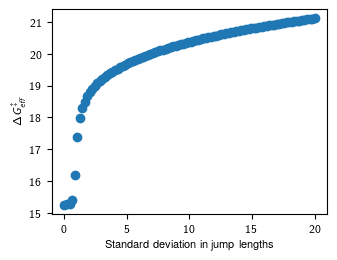

In [46]:
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(len_sigs, len_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$')
plt.xlabel('Standard deviation in jump lengths')
# plt.yticks(np.arange(15,20.5,0.5))
plt.savefig('figs/jump_length_variance.pdf')

In [50]:
n_paths = 5000

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

num_sigs = np.linspace(2, 400, 100)
num_dG = np.zeros((len(num_sigs)))

for j,ns in enumerate(num_sigs):
    n_jump_params = {'mu' : 200,
                    'sigma' : ns}
    rng = np.random.default_rng()
    n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)
    idx = np.where(n_jumps <= 1)[0]
    if len(idx) > 0:
        n_jumps[idx] = 1

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
        model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

    num_dG[j] = model.calculate_effective_barrier()

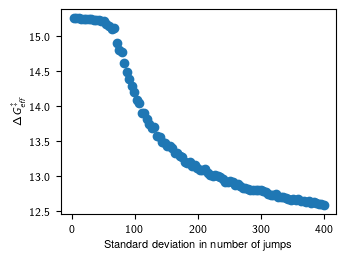

In [52]:
num_sigs = np.linspace(2, 400, 100)
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(num_sigs, num_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$')
plt.xlabel('Standard deviation in number of jumps')
# plt.ylim(13,15.5)
plt.savefig('figs/jump_number_variance.pdf')

In [75]:
n_paths = 5000
delta = 400 # membrane thickness

jump_length_dist = 'normal'
jump_length_params = {'mu' : 5, 'sigma' : 5}

n_jump_mu = round(delta / jump_length_params['mu'])

num_sigs = np.linspace(5, 200, 100)
num_dG = np.zeros((len(num_sigs)))
models = []

for i,ns in tqdm(enumerate(num_sigs)):

    rng = np.random.default_rng()
    n_jumps = rng.normal(loc=n_jump_mu, scale=ns, size=n_paths)
    idx = np.where(n_jumps <= 1)[0]
    while len(idx) > 0:
        n_jumps[idx] = rng.normal(loc=n_jump_mu, scale=ns, size=len(idx))
        idx = np.where(n_jumps <= 1)[0]

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=round(n_jumps[n]), lam=jump_length_params['mu'])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
        model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
        idx = np.where(model.paths[n].jump_lengths <= 0)[0]
        while len(idx) > 0:
            model.paths[n].jump_lengths[idx] = rng.normal(loc=jump_length_params['mu'], scale=jump_length_params['sigma'], size=len(idx))
            idx = np.where(model.paths[n].jump_lengths <= 0)[0]

    num_dG[i] = model.calculate_effective_barrier()
    models.append(model)

100it [02:12,  1.32s/it]


Text(0.5, 0, 'Standard deviation in number of jumps')

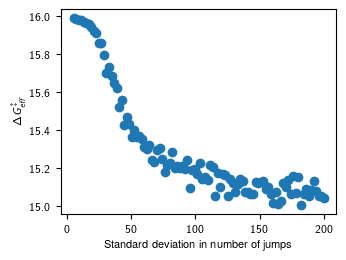

In [76]:
num_sigs = np.linspace(5, 200, 100)
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(num_sigs, num_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$')
plt.xlabel('Standard deviation in number of jumps')
# plt.ylim(13,15.5)
# plt.savefig('figs/jump_number_variance.pdf')

In [77]:
all_deltas = np.zeros((len(models), n_paths))
all_njumps = np.zeros((len(models), n_paths))
all_lengths = []
for i,m in enumerate(models):
    all_deltas[i,:] = np.array(m.deltas) / 10
    for j,p in enumerate(m.paths):
        [all_lengths.append(l) for l in p.jump_lengths]
        all_njumps[i,j] = len(p.jump_lengths)


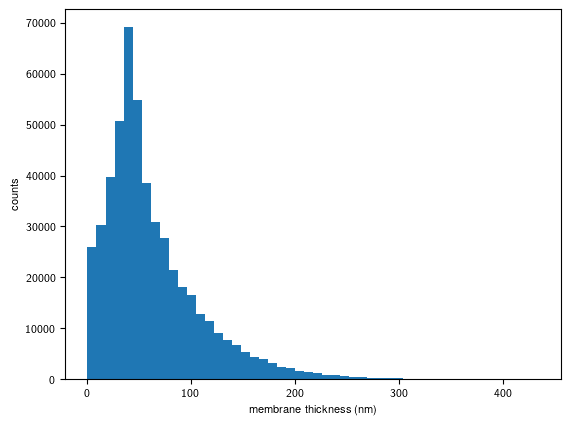

In [78]:
plt.hist(all_deltas.flatten(), bins=50)
plt.xlabel('membrane thickness (nm)')
plt.ylabel('counts');

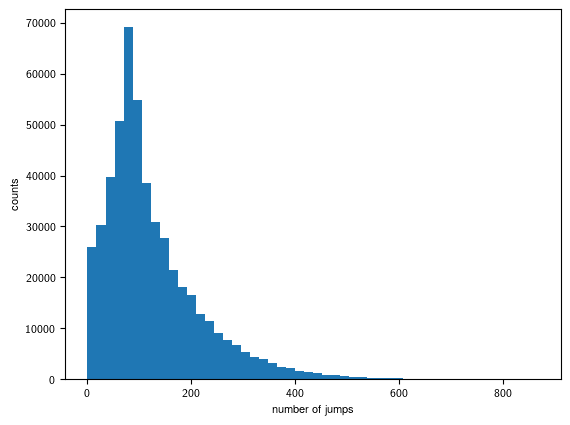

In [79]:
plt.hist(all_njumps.flatten(), bins=50)
plt.xlabel('number of jumps')
plt.ylabel('counts');

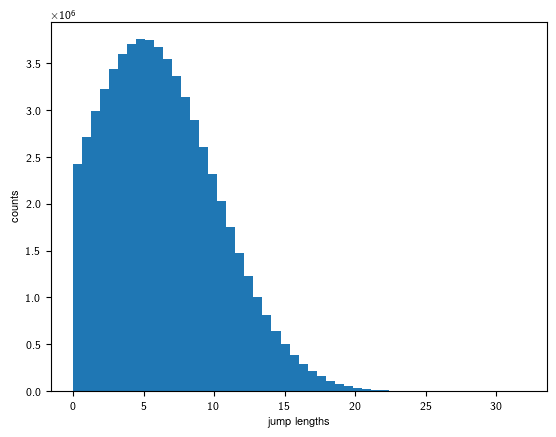

In [80]:
plt.hist(all_lengths, bins=50)
plt.xlabel('jump lengths')
plt.ylabel('counts');

In [48]:
print(num_sigs[-5], models[-5].calculate_effective_barrier())

192.12121212121212 15.106822087126304


In [58]:
import pandas as pd
import seaborn as sns

In [54]:
m = models[-5]
m.calculate_permeability()

df = pd.DataFrame()
df['path'] = np.arange(n_paths)+1
df['permeability'] = m.permeabilities
df['path effective barrier'] = [p.calculate_effective_barrier() for p in m.paths]
df['jump number'] = [p.n_jumps for p in m.paths]
df['mean jump length'] = [p.jump_lengths.mean() for p in m.paths]
df['max jump length'] = [p.jump_lengths.max() for p in m.paths]
df['min jump length'] = [p.jump_lengths.min() for p in m.paths]
df.head()

,path,permeability,path effective barrier,jump number,mean jump length,max jump length,min jump length
0,1,0.004725,13.574023,389,6.414122,18.785669,0.005427
1,2,0.002596,13.825934,458,6.332373,19.391142,0.003093
2,3,0.093835,12.898979,60,6.327794,15.565102,0.233000
3,4,0.007290,13.291639,404,6.398798,21.616900,0.024338
4,5,0.020213,13.145079,197,6.764362,22.360456,0.058781


In [70]:
df.sort_values(by='permeability', ascending=False).head(10)

,path,permeability,path effective barrier,jump number,mean jump length,max jump length,min jump length
1497,1498,26.182874,12.500000,1,15.062988,15.062988,15.062988
2798,2799,20.991239,12.500000,1,12.076244,12.076244,12.076244
2427,2428,18.577078,12.500000,1,10.687379,10.687379,10.687379
3607,3608,7.561649,12.500000,1,4.350211,4.350211,4.350211
218,219,6.752897,12.543226,3,12.531874,15.754275,8.344632
414,415,6.467225,12.500000,1,3.720590,3.720590,3.720590
362,363,5.713688,12.504240,3,9.931676,11.129086,9.161164
4180,4181,5.656748,12.530689,3,10.279049,12.296669,7.299052
420,421,5.421242,12.732264,2,9.211631,14.445655,3.977608
3149,3150,5.131097,12.509373,2,5.997453,6.746775,5.248132


In [57]:
df.sort_values(by='path effective barrier').head(10)

,path,permeability,path effective barrier,jump number,mean jump length,max jump length,min jump length
1015,1016,4.720524,12.500000,1,2.715714,2.715714,2.715714
2427,2428,18.577078,12.500000,1,10.687379,10.687379,10.687379
2524,2525,1.843524,12.500000,1,1.060578,1.060578,1.060578
414,415,6.467225,12.500000,1,3.720590,3.720590,3.720590
3607,3608,7.561649,12.500000,1,4.350211,4.350211,4.350211
2798,2799,20.991239,12.500000,1,12.076244,12.076244,12.076244
1497,1498,26.182874,12.500000,1,15.062988,15.062988,15.062988
362,363,5.713688,12.504240,3,9.931676,11.129086,9.161164
938,939,2.554822,12.507532,2,2.976973,3.310638,2.643308
3149,3150,5.131097,12.509373,2,5.997453,6.746775,5.248132


/Users/nate_schwindt/anaconda3/envs/mpipy/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


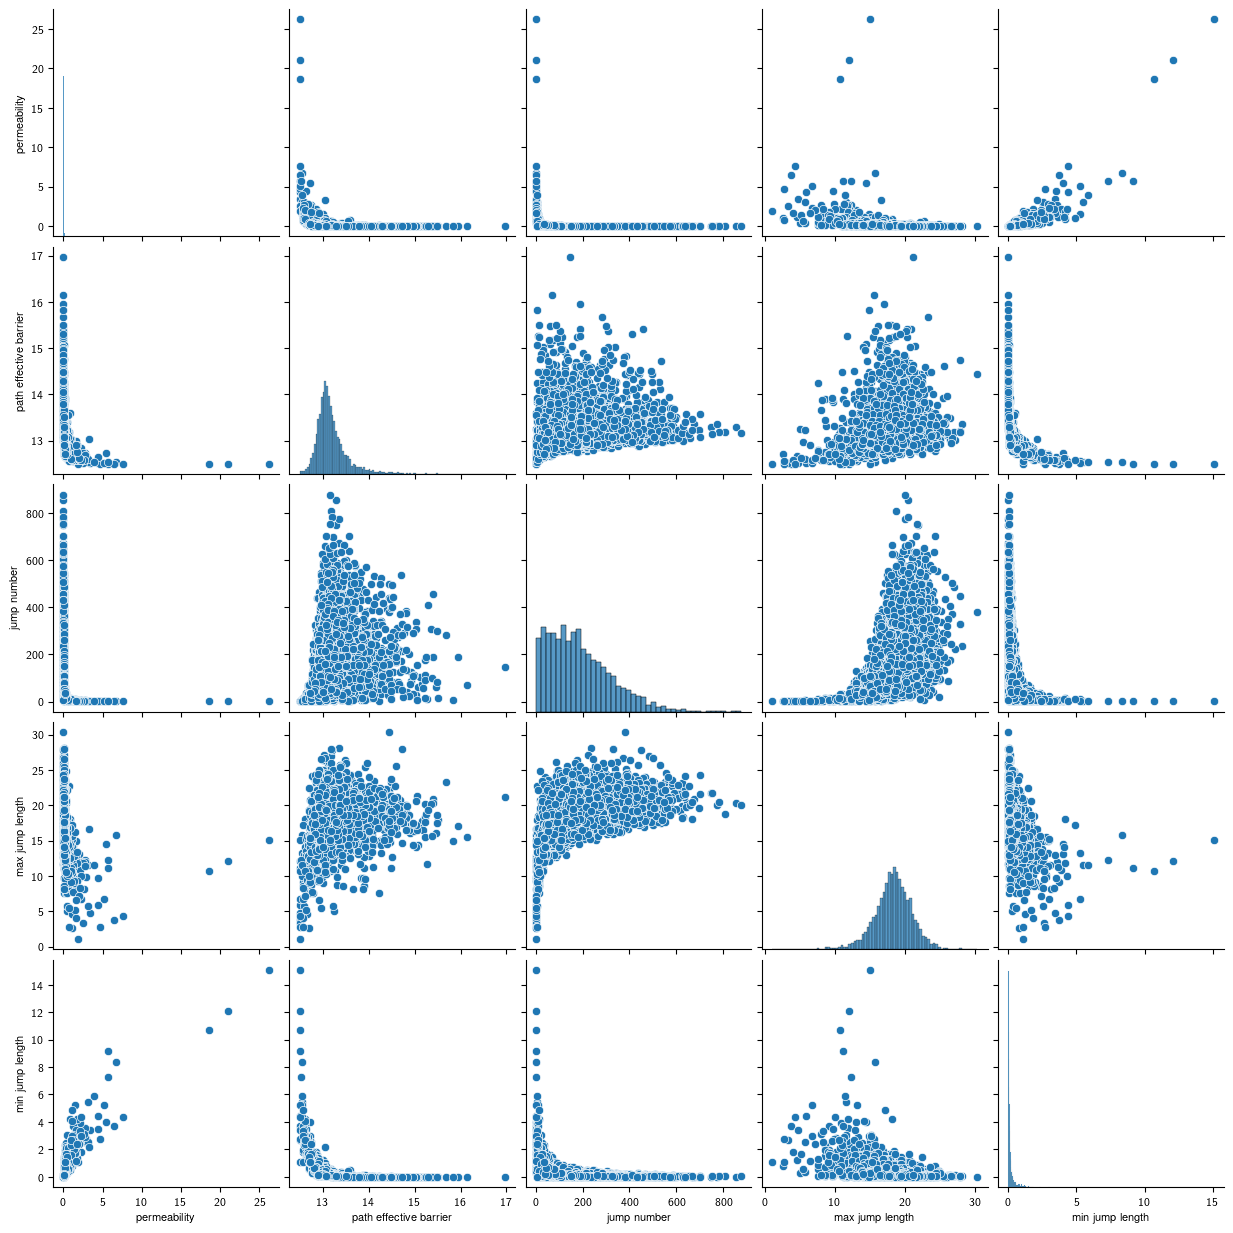

In [62]:
sns.pairplot(data=df.drop(columns=['path','mean jump length']))
plt.savefig('pairplot_high_variance.png')

In [66]:
df.quantile(0.9)

path                      4500.100000
permeability                 0.140334
path effective barrier      13.614865
jump number                377.000000
mean jump length             6.881252
max jump length             21.548255
min jump length              0.475816
Name: 0.9, dtype: float64

In [68]:
highP = df[ df['permeability'] >= df.quantile(0.9)['permeability'] ]
highP.head()

,path,permeability,path effective barrier,jump number,mean jump length,max jump length,min jump length
16,17,0.403645,12.733823,21,7.220435,12.834711,1.087779
17,18,0.171012,12.931396,27,5.479747,15.375259,0.495893
30,31,0.148665,12.844812,41,6.255243,16.064908,0.513279
46,47,0.241905,12.919417,26,7.315691,14.877763,0.604148
49,50,0.319348,12.697021,24,6.137512,14.230237,1.903441


/Users/nate_schwindt/anaconda3/envs/mpipy/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


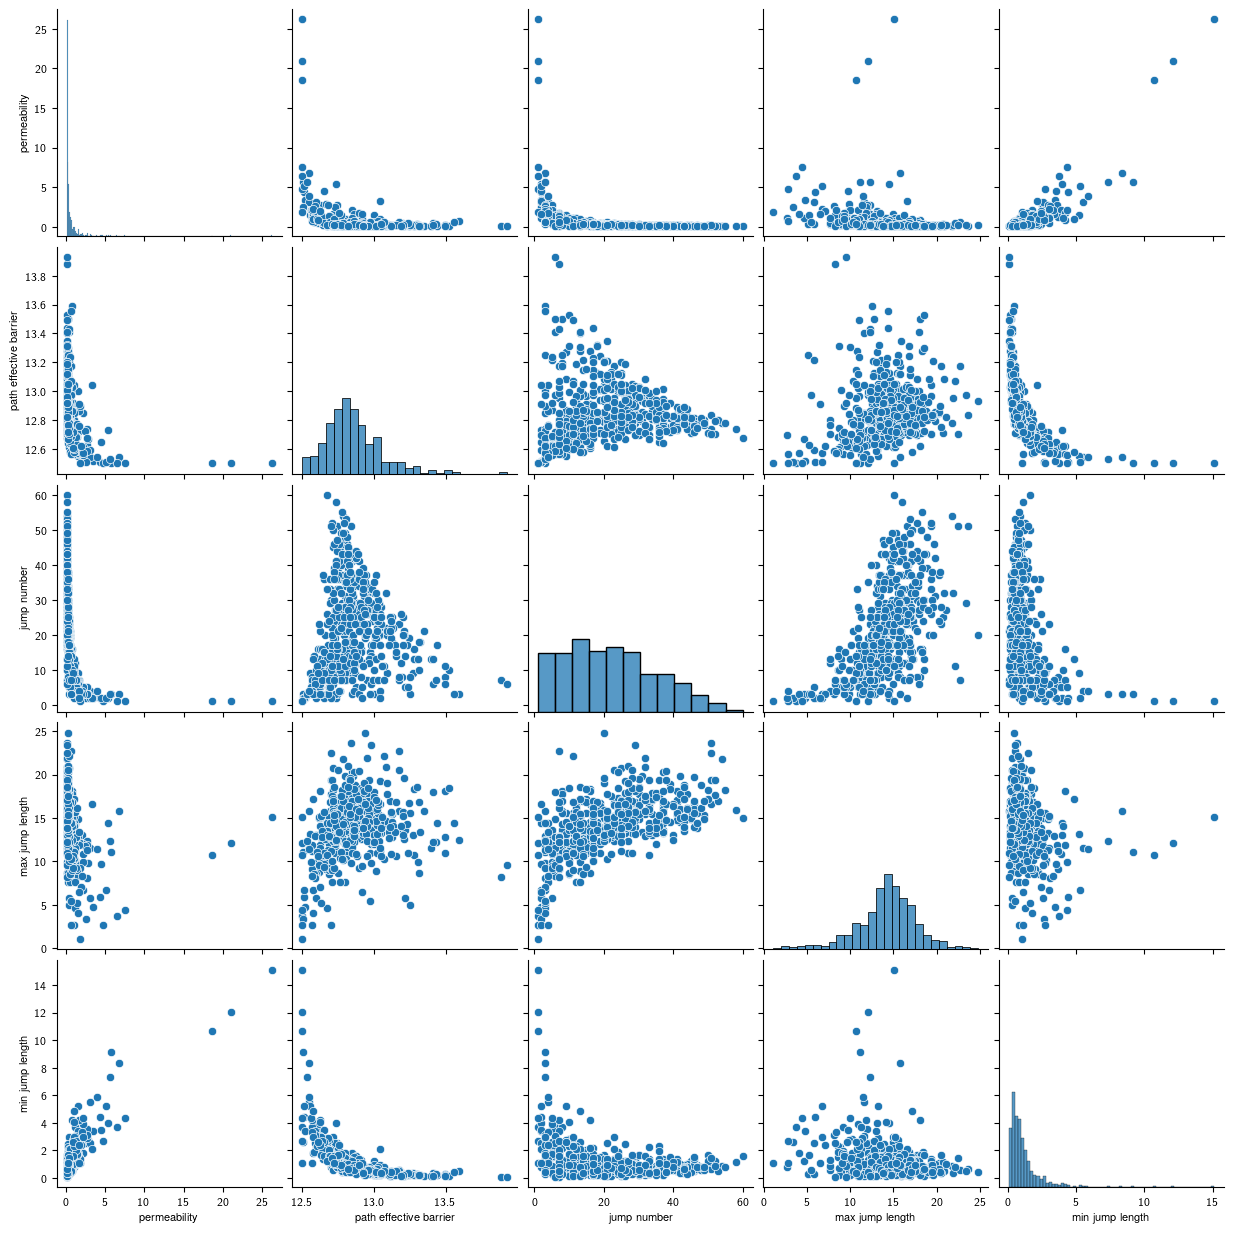

In [69]:
sns.pairplot(data=highP.drop(columns=['path','mean jump length']))
plt.savefig('pairplot_highP.png')

#### Change the jump length to maintain a fixed thickness

In [131]:
n_paths = 5000
delta = 400 # membrane thickness

jump_length_dist = 'equal'
n_jump_mu = 100

num_sigs = np.linspace(5, 200, 100)
num_dG1 = np.zeros((len(num_sigs)))
models1 = []

for i,ns in tqdm(enumerate(num_sigs)):

    rng = np.random.default_rng()
    n_jumps = rng.normal(loc=n_jump_mu, scale=ns, size=n_paths)
    idx = np.where(n_jumps <= 1)[0]
    while len(idx) > 0:
        n_jumps[idx] = rng.normal(loc=n_jump_mu, scale=ns, size=len(idx))
        idx = np.where(n_jumps <= 1)[0]

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=round(n_jumps[n]), lam=delta/n_jumps[n])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)

    num_dG[i] = model.calculate_effective_barrier()
    models1.append(model)

100it [01:32,  1.09it/s]


Text(0.5, 0, 'Standard deviation in number of jumps')

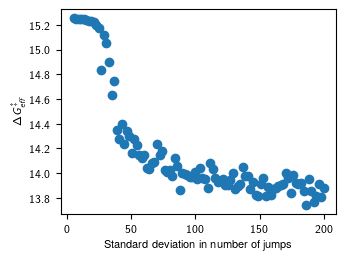

In [132]:
num_sigs = np.linspace(5, 200, 100)
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(num_sigs, num_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$')
plt.xlabel('Standard deviation in number of jumps')

In [133]:
all_deltas = np.zeros((len(models1), n_paths))
all_njumps = np.zeros((len(models1), n_paths))
all_lengths = []
permeabilities = np.zeros(len(models1))
for i,m in enumerate(models1):
    all_deltas[i,:] = np.array(m.deltas) / 10
    permeabilities[i] = m.calculate_permeability()
    for j,p in enumerate(m.paths):
        [all_lengths.append(l) for l in p.jump_lengths]
        all_njumps[i,j] = len(p.jump_lengths)

Text(0.5, 0, 'Standard deviation in number of jumps')

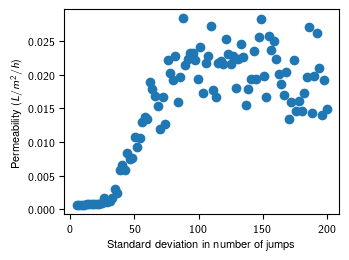

In [134]:
num_sigs = np.linspace(5, 200, 100)
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(num_sigs, permeabilities)
plt.ylabel('Permeability ($L/m^2/h$)')
plt.xlabel('Standard deviation in number of jumps')

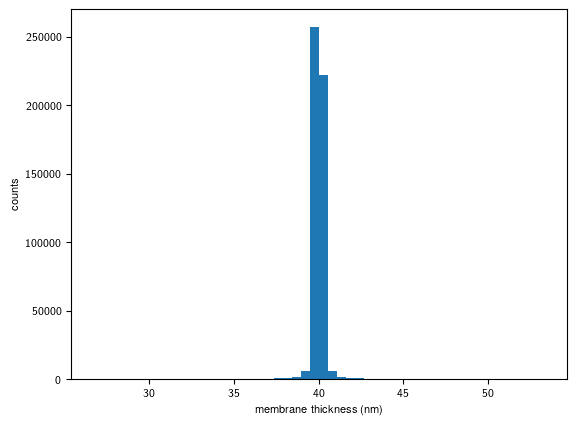

In [114]:
plt.hist(all_deltas.flatten(), bins=50)
plt.xlabel('membrane thickness (nm)')
plt.ylabel('counts');

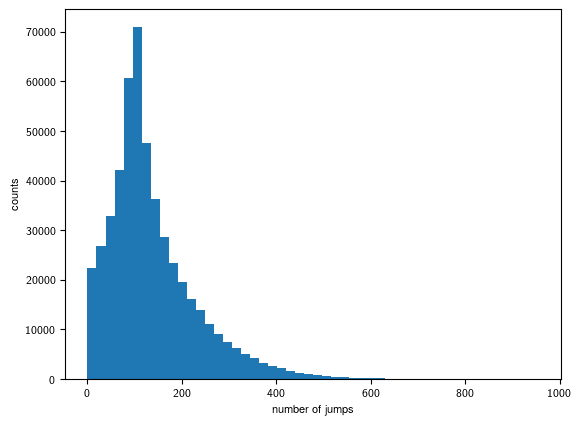

In [115]:
plt.hist(all_njumps.flatten(), bins=50)
plt.xlabel('number of jumps')
plt.ylabel('counts');

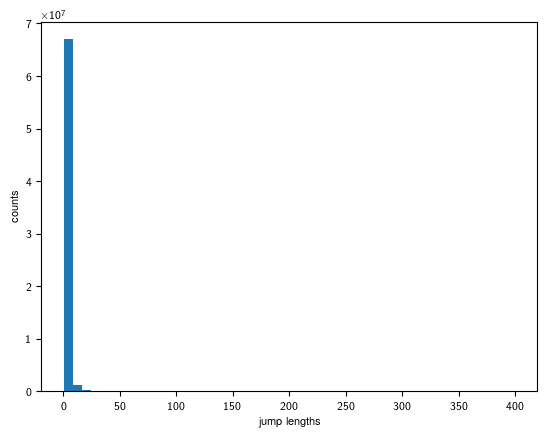

In [116]:
plt.hist(all_lengths, bins=50)
plt.xlabel('jump lengths')
plt.ylabel('counts');

In [117]:
m = models1[-1]
m.calculate_permeability()

df1 = pd.DataFrame()
df1['path'] = np.arange(n_paths)+1
df1['permeability'] = m.permeabilities
df1['percent permeability'] = m.permeabilities / m.permeabilities.sum() * 100
df1['path effective barrier'] = [p.calculate_effective_barrier() for p in m.paths]
df1['jump number'] = [p.n_jumps for p in m.paths]
df1.head()

,path,permeability,percent permeability,path effective barrier,jump number
0,1,0.022248,0.000234,12.5,177
1,2,0.815652,0.008595,12.5,29
2,3,0.006697,0.000071,12.5,322
3,4,0.065477,0.000690,12.5,103
4,5,0.025499,0.000269,12.5,165


Text(0, 0.5, 'Percentage of permeability (\\%)')

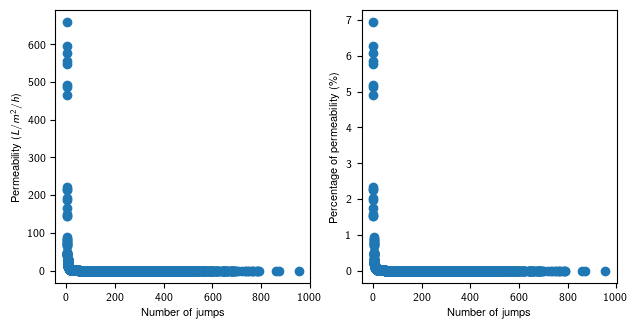

In [118]:
fig, ax = plt.subplots(1,2, figsize=(7.25, 3.55))
ax[0].scatter(df1['jump number'], df1['permeability'])
ax[1].scatter(df1['jump number'], df1['percent permeability'])
ax[0].set_xlabel('Number of jumps')
ax[0].set_ylabel('Permeability ($L/m^2/h$)')
ax[1].set_xlabel('Number of jumps')
ax[1].set_ylabel('Percentage of permeability (\%)')

In [121]:
m = models1[0]
m.calculate_permeability()

df1 = pd.DataFrame()
df1['path'] = np.arange(n_paths)+1
df1['permeability'] = m.permeabilities
df1['percent permeability'] = m.permeabilities / m.permeabilities.sum() * 100
df1['path effective barrier'] = [p.calculate_effective_barrier() for p in m.paths]
df1['jump number'] = [p.n_jumps for p in m.paths]
df1.head()

,path,permeability,percent permeability,path effective barrier,jump number
0,1,0.066881,0.019055,12.5,102
1,2,0.067845,0.019330,12.5,101
2,3,0.069392,0.019770,12.5,100
3,4,0.072694,0.020711,12.5,98
4,5,0.078567,0.022385,12.5,94


Text(0, 0.5, 'Percentage of permeability (\\%)')

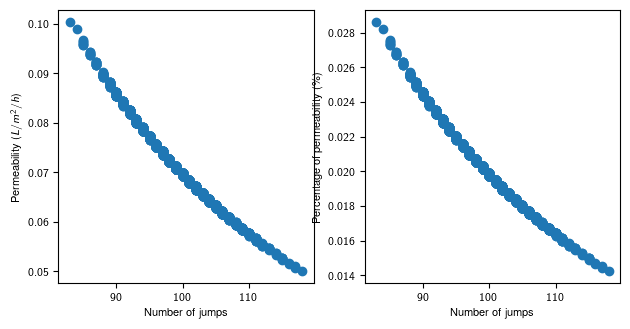

In [122]:
fig, ax = plt.subplots(1,2, figsize=(7.25, 3.55))
ax[0].scatter(df1['jump number'], df1['permeability'])
ax[1].scatter(df1['jump number'], df1['percent permeability'])
ax[0].set_xlabel('Number of jumps')
ax[0].set_ylabel('Permeability ($L/m^2/h$)')
ax[1].set_xlabel('Number of jumps')
ax[1].set_ylabel('Percentage of permeability (\%)')